In [1]:
import networkx as nx
import matplotlib.pyplot as plot
import matplotlib.colors as colors
%matplotlib inline
plot.rcParams['figure.figsize'] = (21, 14)

# Data Source

The data is from arizona state university http://socialcomputing.asu.edu/datasets/BlogCatalog
The dataset contain a nodes csv which include all blogger id and a edges csv indicates friendship network among the bloggers. The blogger's friends are represented using edges. Here is an example: 
1,2
This means blogger with id 1 is friend with blogger id 2.
For this assignment, I only use the first 50 bloggers whose id is from 1 to 50

# Create Graph

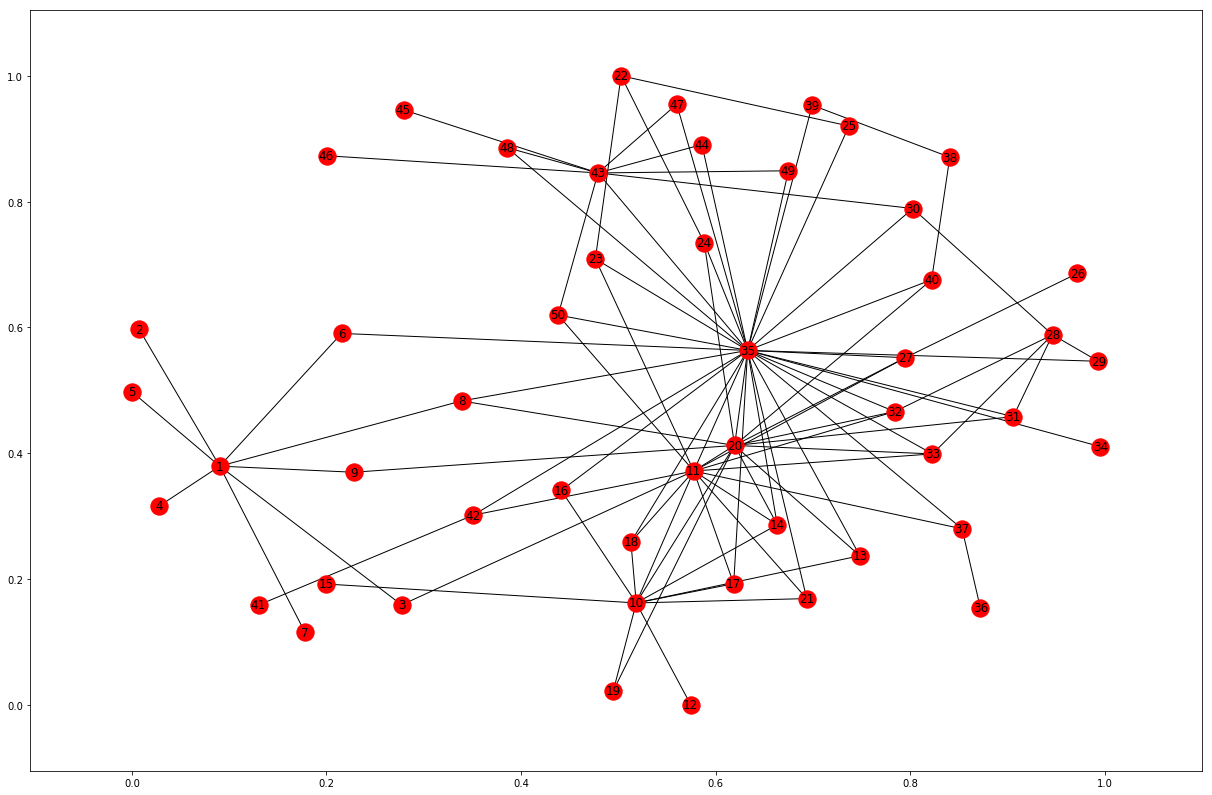

In [80]:
# Load data source
G =nx.Graph()
nodes = "C:/Users/andre/Downloads/BlogCatalog-dataset/BlogCatalog-dataset/data/nodes.csv"
edges = "C:/Users/andre/Downloads/BlogCatalog-dataset/BlogCatalog-dataset/data/edges.csv"
i = 1
# loop through nodes csv to create nodes
with open(nodes ) as f1:
    for row in f1:
        row = row.strip()
        if i <= 50:
             G.add_node(row,color = 'yellow')
             i = i + 1

# loop through edges csv to create edges
j=1
with open(edges ) as f2:
    for row in f2:
        row=row.split(',')
        if j <= 100:
             if  row[0].strip() in G and  row[1].strip() in G:
                G.add_edges_from([(row[0].strip(),row[1].strip())])
                j = j + 1
nx.draw_networkx(G)

In [99]:
# Find number of friend for each blogger
print("# Friend")
friend={}
for v in G:
    friend[v] = G.degree(v)
friend=sorted(zip(friend.values(), friend.keys()), reverse=True)
for i in range(len(friend)):
    print ('%s %d' % (friend[i][1], friend[i][0]))

# Friend
35 30
11 15
20 14
10 11
43 9
1 8
28 5
33 4
32 4
27 4
14 4
8 3
50 3
42 3
40 3
37 3
31 3
30 3
24 3
23 3
22 3
21 3
18 3
17 3
13 3
9 2
6 2
49 2
48 2
47 2
44 2
39 2
38 2
3 2
29 2
25 2
19 2
16 2
7 1
5 1
46 1
45 1
41 1
4 1
36 1
34 1
26 1
2 1
15 1
12 1


In [111]:
# Find closet distance 
col = nx.closeness_centrality(G)
col=sorted(zip(col.values(), col.keys()), reverse=True)
print('Blogger   Closeness')
for i in range(len(col)):
    print ('%s         %f' % (col[i][1], col[i][0]))

Blogger   Closeness
35         0.662162
11         0.544444
20         0.532609
8         0.466667
6         0.445455
43         0.441441
14         0.441441
33         0.437500
32         0.437500
27         0.437500
21         0.433628
18         0.433628
17         0.433628
13         0.433628
50         0.429825
40         0.429825
31         0.429825
24         0.429825
42         0.426087
37         0.426087
23         0.426087
16         0.426087
30         0.418803
10         0.418803
49         0.411765
48         0.411765
47         0.411765
44         0.411765
39         0.408333
29         0.408333
25         0.408333
34         0.401639
3         0.392000
9         0.382812
19         0.368421
1         0.355072
28         0.328859
22         0.314103
46         0.308176
45         0.308176
38         0.306250
26         0.306250
41         0.300613
36         0.300613
15         0.296970
12         0.296970
7         0.263441
5         0.263441
4         0.263441
2       

In [112]:
# Find longest path
l=1
longest = []
for v in G:
    for w in G:
        p=nx.shortest_path(G,source = v,target= w)
        if len(p)> l:
            longest = p
            l = len(p)
print('Longest path to reach to the other blogger in the network')
longest

Longest path to reach to the other blogger in the network


['2', '1', '3', '11', '10', '12']

In [108]:
# Find triangle relationship
tri = nx.triangles(G)
tri = sorted(zip(tri.values(), tri.keys()), reverse=True)
print('Blogger   #Triangle')
for i in range(len(tri)):
    print ('%s           %d' % (tri[i][1], tri[i][0]))

Blogger   #Triangle
35           27
11           21
20           18
10           8
43           6
14           5
33           3
32           3
27           3
50           2
21           2
18           2
17           2
13           2
8           1
49           1
48           1
47           1
44           1
42           1
40           1
37           1
31           1
30           1
24           1
23           1
19           1
9           0
7           0
6           0
5           0
46           0
45           0
41           0
4           0
39           0
38           0
36           0
34           0
3           0
29           0
28           0
26           0
25           0
22           0
2           0
16           0
15           0
12           0
1           0


In [135]:
# Find triangle relationship for given blogger
def find_triangle(b):
    all_neighbors=nx.neighbors(G,b)

    for i in range(len(all_neighbors)):
        for j in range(1,len(all_neighbors)):
            if all_neighbors[i] in nx.neighbors(G,all_neighbors[j]):
                print("Blogger %s has triangle relationship with %s and %s"% (b,all_neighbors[i],all_neighbors[j]) )
      
find_triangle('13')        

Blogger 13 has triangle relationship with 10 and 20
Blogger 13 has triangle relationship with 35 and 20
Blogger 13 has triangle relationship with 20 and 35


range(1, 3)